# Importing the Modules

In [113]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smapi

In [10]:
data = pd.read_csv('../data/diamonds.csv')
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [11]:
data.shape

(53940, 11)

# Data Preprocessing

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [13]:
#Drop Indices
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [14]:
#Dropping diamonds which have missing dimension(s) as they wont have a volume
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [16]:
#Get description of our data
data.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [31]:
#Create volume column
volume_diamond = (data['x']*data['y']*data['z'])/3
data = pd.concat([data,pd.Series(volume_diamond,name='volume'),pd.Series(lw_prop,name='lw_prop')],axis=1)

In [32]:
# Summary statistics of numerical variable
for i in data.select_dtypes('object').columns:
    print(data.iloc[:][i].value_counts(),'\n')

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64 

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64 

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64 



# Data Visualization

In [79]:
#Obtain correlations of our variables
data.corr()

carat     depth     table     price         x         y         z  \
carat    1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048   
depth    0.028259  1.000000 -0.295733 -0.010729 -0.025017 -0.029069  0.095023   
table    0.181646 -0.295733  1.000000  0.127245  0.196097  0.184493  0.152483   
price    0.921592 -0.010729  0.127245  1.000000  0.887231  0.867864  0.868206   
x        0.977779 -0.025017  0.196097  0.887231  1.000000  0.974918  0.975435   
y        0.953991 -0.029069  0.184493  0.867864  0.974918  1.000000  0.956744   
z        0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000   
volume   0.978280  0.009039  0.167809  0.904255  0.958533  0.977016  0.951912   
lw_prop  0.126739  0.053081  0.128755  0.079764  0.142516  0.002743  0.113000   

           volume   lw_prop  
carat    0.978280  0.126739  
depth    0.009039  0.053081  
table    0.167809  0.128755  
price    0.904255  0.079764  
x        0.958533  0.142516  
y        0.977016  0.002743  
z        0.951912  0.113000  
volume   1.000000  0.041384  
lw_prop  0.041384  1.000000

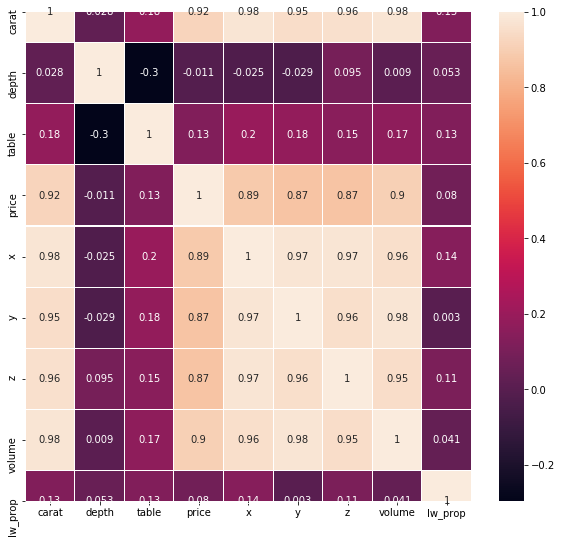

In [34]:
#lets plot a heatmap of our correlations
corrmat = data.corr() # For calculating correlation
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(round(corrmat,3),ax=ax,linewidths = 0.1,annot=True)

<Figure size 432x288 with 0 Axes>

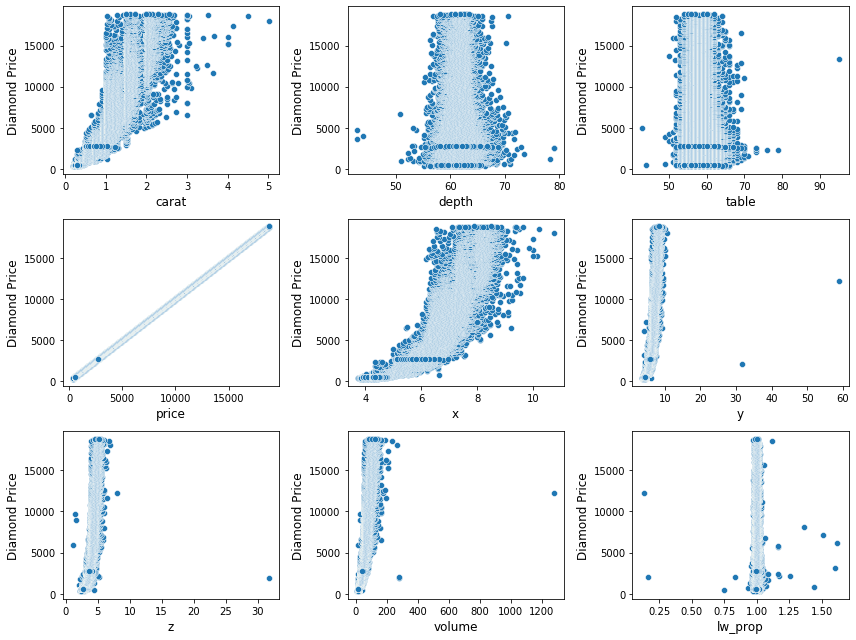

<Figure size 432x288 with 0 Axes>

In [35]:
#Pairplot of objective variable (price) with other variables
numerical_var = list(data.columns[data.dtypes!=object])


fig,axes = plt.subplots(3,3,sharey=False) # Prepare the grids
fig.set_size_inches(12,9)                 # Set size of these grids
ax = axes.ravel()

# Create plots with looping
for i in range(len(numerical_var)):
    sns.scatterplot(x=numerical_var[i],y='price',data=data,ax=ax[i])
    ax[i].set_xlabel(numerical_var[i],fontsize=12)
    ax[i].set_ylabel('Diamond Price',fontsize=12)

plt.tight_layout()
plt.figure()



In [50]:
#Get description for all categorical variable values

cut_values = list(set(data['cut'].tolist()))
colour_values = list(set(data['color'].tolist()))
clarity_values = list(set(data['clarity'].tolist()))

In [58]:
data_describe_cut = pd.DataFrame()
for i in cut_values:
    cat_describe = pd.Series(data[data['cut'] == i]['price'].describe(),name=i)
    data_describe_cut = pd.concat([data_describe_cut,cat_describe],axis=1,sort=False)
data_describe_cut

Fair       Premium         Ideal          Good     Very Good
count   1609.000000  13780.000000  21548.000000   4902.000000  12081.000000
mean    4357.500932   4579.684543   3456.941201   3926.403509   3981.664101
std     3561.136245   4343.906282   3808.093737   3676.772435   3936.010981
min      337.000000    326.000000    326.000000    327.000000    336.000000
25%     2050.000000   1046.000000    878.000000   1144.250000    912.000000
50%     3282.000000   3182.000000   1809.500000   3050.500000   2647.000000
75%     5198.000000   6290.250000   4678.000000   5028.000000   5373.000000
max    18574.000000  18823.000000  18806.000000  18707.000000  18818.000000

In [69]:
data_describe_colour = pd.DataFrame()
for i in colour_values:
    colour_describe = pd.Series(data[data['color'] == i]['price'].describe(),name=i)
    data_describe_colour = pd.concat([data_describe_colour,colour_describe],axis=1,sort=False)
data_describe_colour

G             J             D             F             E  \
count  11284.000000   2808.000000   6774.000000   9538.000000   9797.000000   
mean    3996.876551   5323.818020   3168.106436   3725.080205   3076.752475   
std     4049.165898   4438.187251   3353.391411   3785.694119   3344.158685   
min      354.000000    335.000000    357.000000    342.000000    326.000000   
25%      931.000000   1860.500000    911.000000    982.000000    882.000000   
50%     2240.000000   4234.000000   1836.500000   2343.500000   1739.000000   
75%     6048.000000   7695.000000   4212.500000   4868.250000   4003.000000   
max    18818.000000  18710.000000  18693.000000  18791.000000  18731.000000   

                  H             I  
count   8298.000000   5421.000000  
mean    4480.942155   5089.973990  
std     4208.831366   4720.748071  
min      337.000000    334.000000  
25%      984.000000   1120.000000  
50%     3453.500000   3730.000000  
75%     5975.000000   7186.000000  
max    18803.000000  18823.000000

In [72]:
data_describe_clarity = pd.DataFrame()
for i in clarity_values:
    clarity_describe = pd.Series(data[data['clarity'] == i]['price'].describe(),name=i)
    data_describe_clarity = pd.concat([data_describe_clarity,clarity_describe],axis=1,sort=False)
data_describe_clarity

VVS1           SI1            IF           VS1            I1  \
count   3654.000000  13063.000000   1790.000000   8170.000000    738.000000   
mean    2519.512315   3994.112608   2864.839106   3839.144308   3926.189702   
std     3328.175459   3796.689858   3920.248499   4011.894939   2811.615917   
min      336.000000    326.000000    369.000000    327.000000    345.000000   
25%      816.000000   1089.000000    895.000000    876.000000   2071.000000   
50%     1092.500000   2822.000000   1080.000000   2005.000000   3346.000000   
75%     2376.000000   5249.500000   2388.500000   6021.000000   5167.750000   
max    18777.000000  18818.000000  18806.000000  18795.000000  18531.000000   

                VS2          VVS2           SI2  
count  12254.000000   5066.000000   9185.000000  
mean    3922.866819   3283.737071   5060.440174  
std     4040.065223   3821.647537   4256.944654  
min      334.000000    336.000000    326.000000  
25%      900.000000    794.250000   2264.000000  
50%     2052.000000   1311.000000   4072.000000  
75%     6022.750000   3638.250000   5775.000000  
max    18823.000000  18768.000000  18804.000000

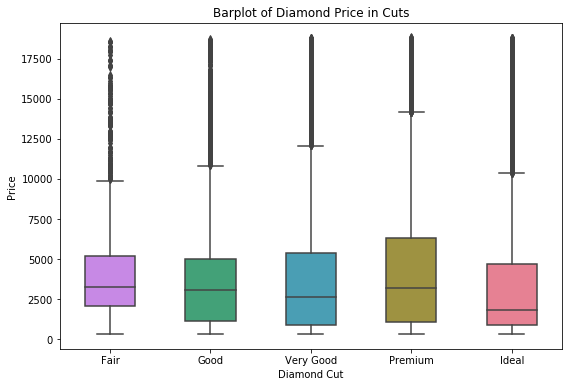

In [48]:
#Lets create some boxplots to see how different categorical variables affect price
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='cut',hue='cut',data=data,palette='husl',order=cut_cats,width=0.5,
                  dodge=False)
fig.get_legend().remove()                      # Remove legend
plt.xlabel('Diamond Cut')                      # Horizontal labels
plt.ylabel('Price')                            # Vertical labels
plt.title('Barplot of Diamond Price in Cuts')  # Title of figure
plt.show(fig)

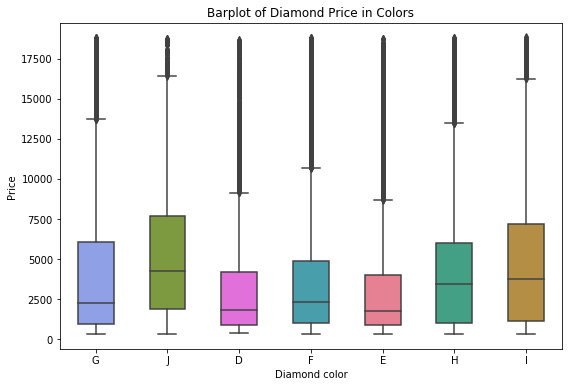

In [76]:
# Choose the size
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='color',hue='color',data=data,palette='husl',order=colour_values,width=0.5,
                  dodge=False)
fig.get_legend().remove()                        # Remove legend
plt.xlabel('Diamond color')                      # Horizontal labels
plt.ylabel('Price')                              # Vertical labels
plt.title('Barplot of Diamond Price in Colors')  # Title of figure
plt.show(fig)

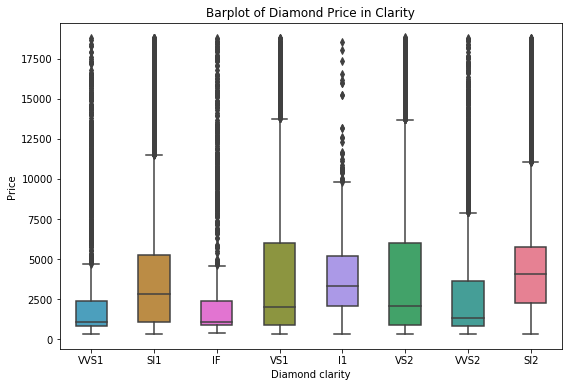

In [78]:
#Choose the size
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='clarity',hue='clarity',data=data,palette='husl',order=clarity_values,
                  width=0.5,dodge=False)
fig.get_legend().remove()                           # Remove legend
plt.xlabel('Diamond clarity')                       # Horizontal labels
plt.ylabel('Price')                                 # Vertical labels
plt.title('Barplot of Diamond Price in Clarity')    # Title of figure
plt.show(fig)

In [86]:
#We can now start removing outliers and columns with low correlation to price
#data.drop(['depth','table'],axis=1,inplace=True)

#Drop outliers using bonferroni outlier test
regression = smapi.ols(formula='price~volume',data=data).fit()
test = regression.outlier_test()
test[test['bonf(p)'] < 0.05]

student_resid       unadj_p       bonf(p)
15684      -5.069469  4.002446e-07  2.158119e-02
16283      -8.094704  5.859217e-16  3.159290e-11
17196      -5.881191  4.097195e-09  2.209208e-04
17897      -5.025839  5.028363e-07  2.711293e-02
19339      -6.603952  4.040465e-11  2.178619e-06
...              ...           ...           ...
27735       5.167847  2.376477e-07  1.281397e-02
27740       4.992827  5.968709e-07  3.218328e-02
27747       5.513178  3.540222e-08  1.908888e-03
48410     -20.430517  2.008060e-92  1.082746e-87
49189     -20.368082  7.128227e-92  3.843540e-87

[99 rows x 3 columns]

In [87]:
#Remove outliers

indices = list(test[test['bonf(p)'] < 0.05].index)
not_in_indices = [x for x in data.index if x not in indices]
train_data_clean = data.loc[not_in_indices]

<Figure size 432x288 with 0 Axes>

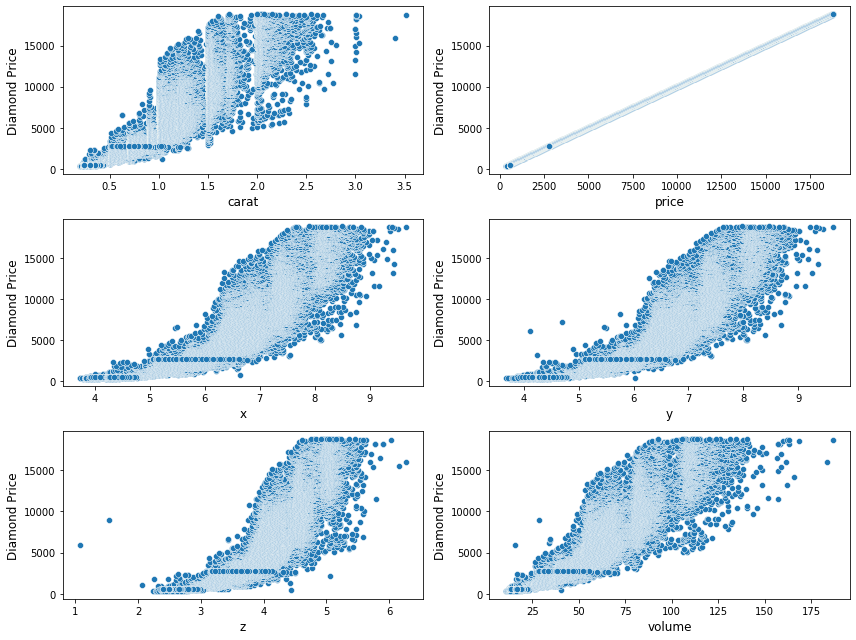

<Figure size 432x288 with 0 Axes>

In [104]:
#Plot numeric variables against price

numerical_var = list(train_data_clean.columns[train_data_clean.dtypes!=object])

fig,axes = plt.subplots(3,2,sharey=False) # Prepare the grids
fig.set_size_inches(12,9)                 # Set size of these grids
ax = axes.ravel()

# Create plots with looping
for i in range(len(numerical_var)-1):
    sns.scatterplot(x=numerical_var[i],y='price',data=train_data_clean,ax=ax[i])
    ax[i].set_xlabel(numerical_var[i],fontsize=12)
    ax[i].set_ylabel('Diamond Price',fontsize=12)

plt.tight_layout()
plt.figure()

We can see that there is an exponential relation so we will transform with logs

In [107]:
data_with_logs = data.copy()
# Data transformation
data_with_logs['price'] = np.log(data_with_logs['price'])
data_with_logs['carat'] = np.log(data_with_logs['carat'])
data_with_logs['volume'] = np.log(data_with_logs['volume'])

<Figure size 432x288 with 0 Axes>

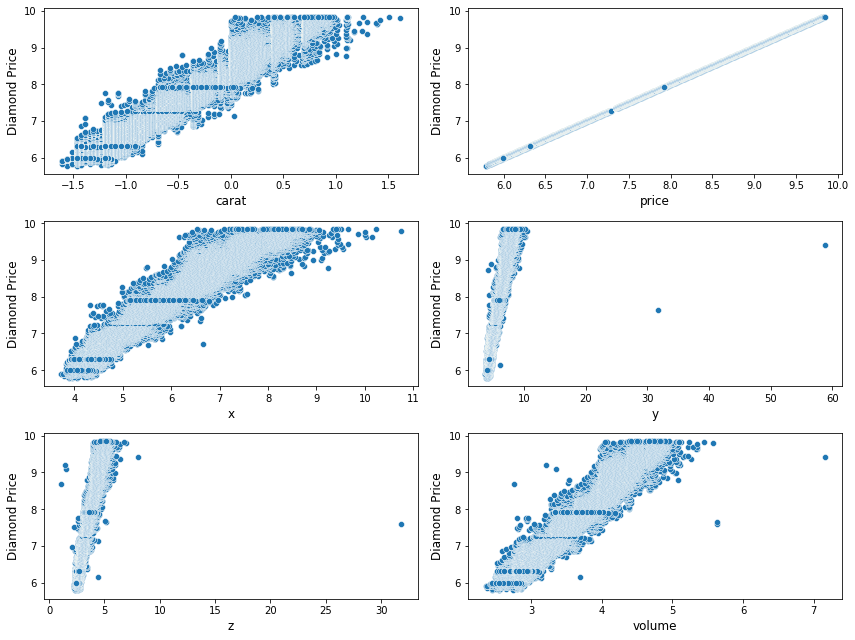

<Figure size 432x288 with 0 Axes>

In [108]:
#Plot price against other variables with logs applied
fig,axes = plt.subplots(3,2,sharey=False) # Prepare the grids
fig.set_size_inches(12,9)                 # Set size of these grids
ax = axes.ravel()

# Create plots with looping
for i in range(len(numerical_var)-1):
    sns.scatterplot(x=numerical_var[i],y='price',data=data_with_logs,ax=ax[i])
    ax[i].set_xlabel(numerical_var[i],fontsize=12)
    ax[i].set_ylabel('Diamond Price',fontsize=12)

plt.tight_layout()
plt.figure()

In [110]:
#Identified some outliers in x, y and volume
data_with_logs = data_with_logs[(data_with_logs["z"]<15)]
data_with_logs = data_with_logs[(data_with_logs["y"]<20)]
data_with_logs = data_with_logs[(data_with_logs["volume"]<6)]

<Figure size 432x288 with 0 Axes>

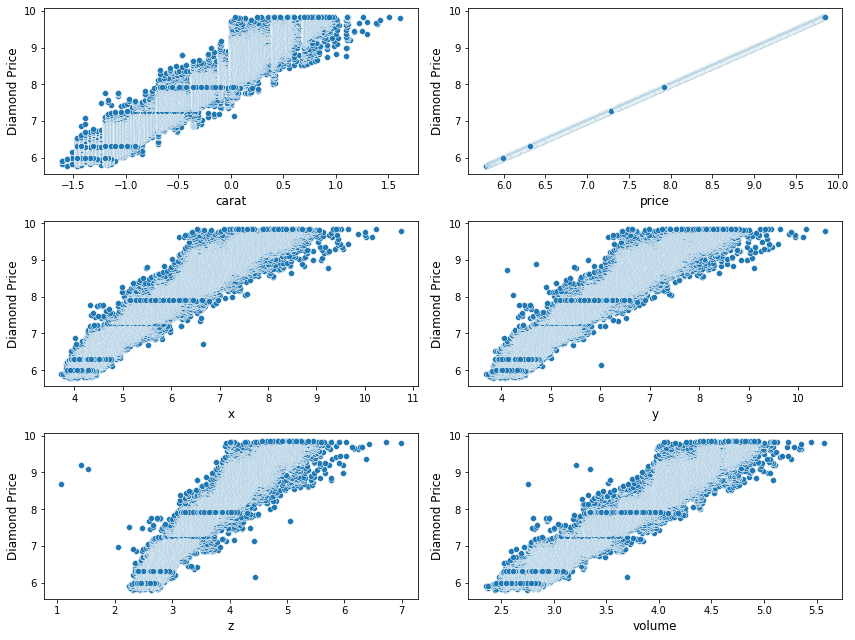

<Figure size 432x288 with 0 Axes>

In [112]:
#Plot price again with removed outliers
fig,axes = plt.subplots(3,2,sharey=False) # Prepare the grids
fig.set_size_inches(12,9)                 # Set size of these grids
ax = axes.ravel()

# Create plots with looping
for i in range(len(numerical_var)-1):
    sns.scatterplot(x=numerical_var[i],y='price',data=data_with_logs,ax=ax[i])
    ax[i].set_xlabel(numerical_var[i],fontsize=12)
    ax[i].set_ylabel('Diamond Price',fontsize=12)

plt.tight_layout()
plt.figure()

In [114]:
data_with_logs

carat        cut color clarity     price     x     y     z    volume
0     -1.469676      Ideal     E     SI2  5.786897  3.95  3.98  2.43  2.544276
1     -1.560648    Premium     E     SI1  5.786897  3.89  3.84  2.31  2.442517
2     -1.469676       Good     E     VS1  5.789960  4.05  4.07  2.31  2.540995
3     -1.237874    Premium     I     VS2  5.811141  4.20  4.23  2.63  2.745658
4     -1.171183       Good     J     SI2  5.814131  4.34  4.35  2.75  2.851039
...         ...        ...   ...     ...       ...   ...   ...   ...       ...
53935 -0.328504      Ideal     D     SI1  7.921898  5.75  5.76  3.50  3.654288
53936 -0.328504       Good     D     SI1  7.921898  5.69  5.75  3.61  3.673006
53937 -0.356675  Very Good     D     SI1  7.921898  5.66  5.68  3.56  3.641523
53938 -0.150823    Premium     H     SI2  7.921898  6.15  6.12  3.74  3.848488
53939 -0.287682      Ideal     D     SI2  7.921898  5.83  5.87  3.64  3.726243

[53917 rows x 9 columns]

In [117]:
s = (data_with_logs.dtypes =="object")
object_cols = list(s[s].index)

In [119]:
#Getting dummies:
label_data = data_with_logs.copy()

#Apply encoder
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity     price     x     y     z    volume
0 -1.469676    2      1        3  5.786897  3.95  3.98  2.43  2.544276
1 -1.560648    3      1        2  5.786897  3.89  3.84  2.31  2.442517
2 -1.469676    1      1        4  5.789960  4.05  4.07  2.31  2.540995
3 -1.237874    3      5        5  5.811141  4.20  4.23  2.63  2.745658
4 -1.171183    1      6        3  5.814131  4.34  4.35  2.75  2.851039

# Export dataset to model on different notebook

In [122]:
label_data.to_csv('../data/export_diamonds.csv', index = False, header=True)